You should consider upgrading via the 'c:\users\micha\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for pylatex: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42829 sha256=1639a499af0e37f29245f9acf4ae304d0ec8796d4f14a91c735c312cee0b6c28
  Stored in directory: c:\users\micha\appdata\local\pip\cache\wheels\11\33\be\8b396510c8b5aaf308d22248f7cb1cf90fef1039583f7a7e15
Successfully built pylatex


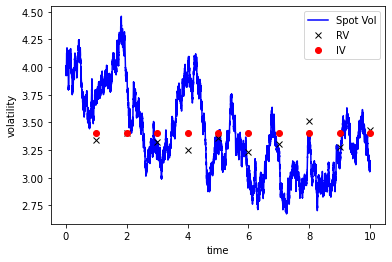

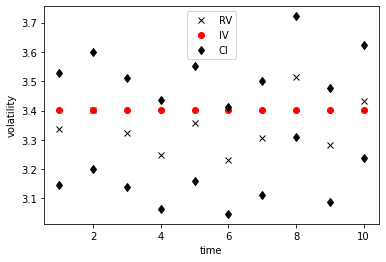

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

def SV_Heston(T, n, theta, kappa, xi, rho):
    N = T*n + 1
    dt = 1/n

    v0 = theta
    dW = np.random.randn(N,1) * np.sqrt(dt)
    dB = rho*dW + np.sqrt((1-rho**2))*np.random.randn(N,1)*np.sqrt(dt)
    v = np.ones((N,1)) * v0
    for j in range(1,N):
        v[j] = v[j-1] + kappa * (theta - v[j-1]) * dt + xi * np.sqrt(v[j-1]) * dB[j-1]
    v = np.maximum(v,0)
    sigma = np.sqrt(v)
    X = np.cumsum(sigma * dW)
    return X, sigma

n = 2340
dt = 1/n
T = 10
sigma0, kappa, xi, rho = 0.04/250, 5/250, 0.50/250, -0.50
X, sigma = SV_Heston(T, n, sigma0, kappa, xi, rho)
r = np.diff(X).reshape(n, T)
RV = np.sum(r**2, axis=0)
s = sigma[:-1].reshape(n, T)
IV = np.mean(s**2, axis=0)

a = 100 * 250

plt.figure()
plt.plot(np.linspace(0,T,num=T*n+1), a * sigma**2, '-b', np.arange(1,T+1), a * RV, 'kx', np.arange(1,T+1), a * IV, 'ro')
plt.legend(['Spot Vol', 'RV', 'IV'])
plt.xlabel('time')
plt.ylabel('volatility')

RQ = n * np.sum(r**4, axis=0)
CI = 1.96 * np.sqrt(2*RQ/3) / np.sqrt(n)
id = np.arange(1,T+1)

plt.figure()
plt.plot(id, a * RV, 'kx', id, a * IV, 'ro', id, a * (RV-CI), 'kd', id, a * (RV+CI), 'kd')
plt.legend(['RV', 'IV', 'CI'])
plt.xlabel('time')
plt.ylabel('volatility')

plt.show()
